In [10]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("C:/Users/Souradeep/OneDrive/Desktop/Data Science/Kaggle Datasets/Glioma Grading/TCGA_InfoWithGrade.csv")
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [12]:
# Checking for missing values
data.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

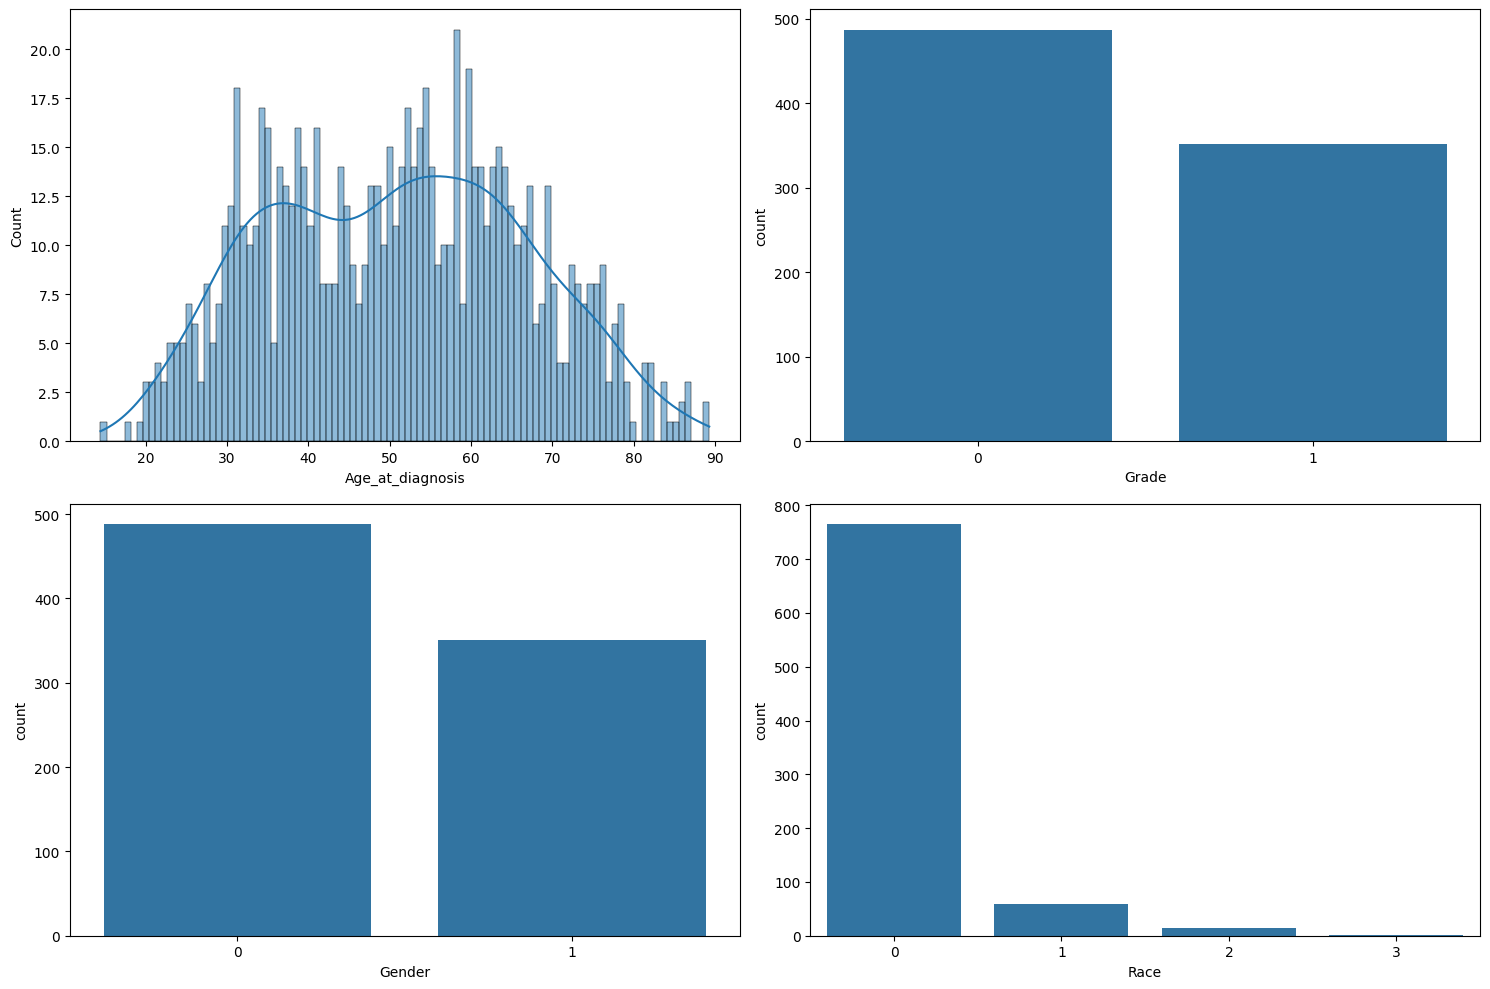

In [13]:
# Plotting distributions 
plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
sns.histplot(x = 'Age_at_diagnosis', data = data, bins = 100, kde = True)
plt.subplot(2,2,2)
sns.countplot(x = 'Grade', data = data)
plt.subplot(2,2,3)
sns.countplot(x = 'Gender', data = data)
plt.subplot(2,2,4)
sns.countplot(x = 'Race', data = data)
plt.tight_layout()
plt.show()

In [14]:
# Defining target and features
X = data.drop('Grade', axis = 1)
y = data['Grade']

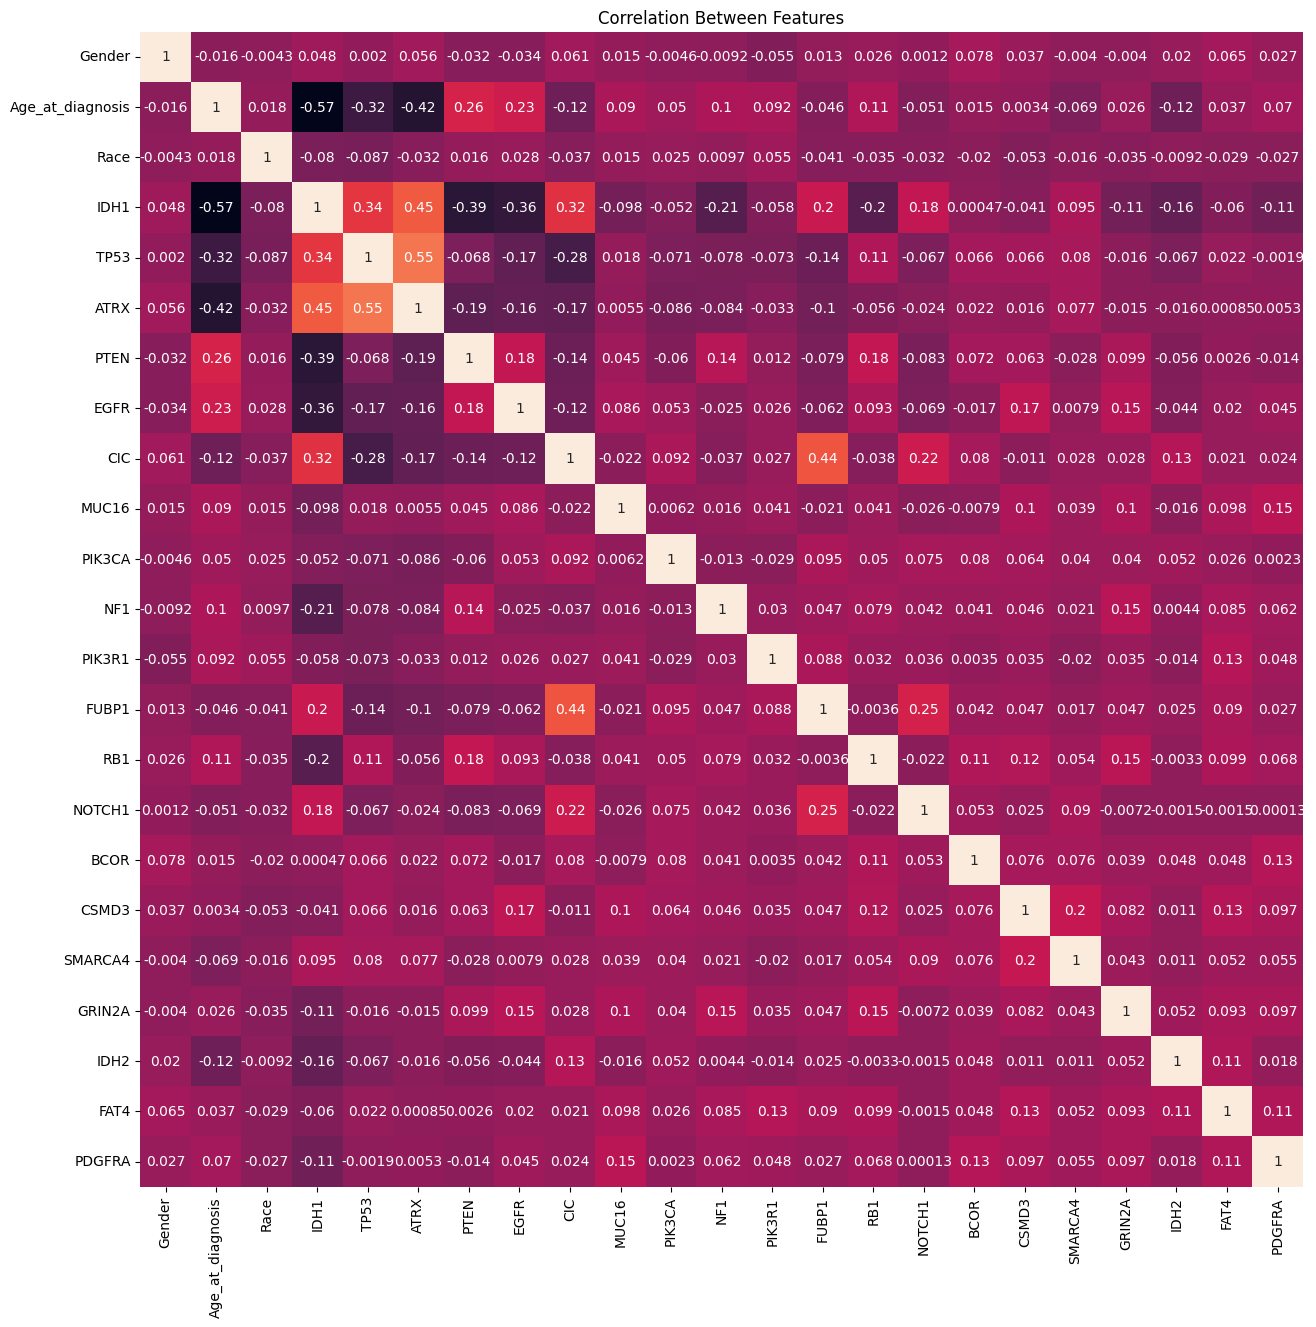

In [15]:
# Feature Correlation
plt.figure(figsize = (15, 15))
sns.heatmap(X.corr(), annot = True, cbar = False)
plt.title("Correlation Between Features")
plt.show()

In [ ]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
# Loading data into DMatrix
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data = X_train, label = y_train)
dmatrix_test = xgb.DMatrix(data = X_test, label = y_test)

In [20]:
# Hyperparameter Grid
params = {
    'objective': ['binary:logistic'], 
    'eval_metric': ['auc'],       
    'max_depth' : [3, 5, 10, 15, 20],                  
    'learning_rate': [0.1, 0.5],                     
    'n_estimators' : [5, 10, 20, 50, 75, 100, 150, 200, 250, 500],
    'gamma' : [0.1, 0.3, 0.5, 0.8, 1],
    'seed' : [42]
}

In [ ]:
# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV, KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
random_search = RandomizedSearchCV(estimator = xgb.XGBClassifier(), param_distributions = params, n_iter = 100, scoring = 'roc_auc', cv = cv, n_jobs = -1, verbose = 1)
random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters:  {'seed': 42, 'objective': 'binary:logistic', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'eval_metric': 'auc'}


In [ ]:
# Training the model
model = xgb.train(params = random_search.best_params_, dtrain = dmatrix_train, num_boost_round = 100)

In [ ]:
# Predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(dmatrix_test)
y_pred = np.round(y_pred)
y_pred

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [28]:
accuracy_score(y_test, y_pred)

0.8809523809523809

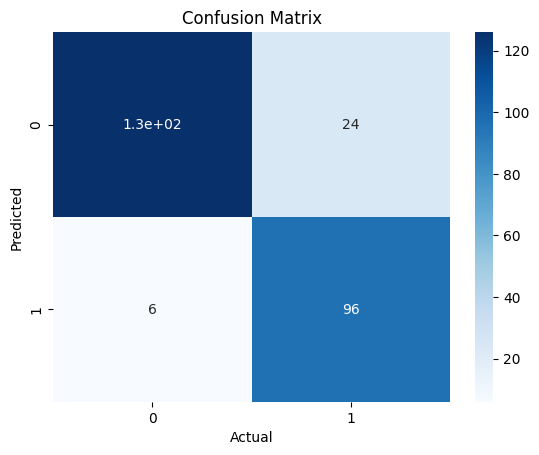

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       150
           1       0.80      0.94      0.86       102

    accuracy                           0.88       252
   macro avg       0.88      0.89      0.88       252
weighted avg       0.89      0.88      0.88       252

